# Trabajo Práctico Final
### Probabilidad y Estadística para la Inteligencia Artificial

## Autores
### Grupo 4

- **Mealla Pablo**.
- **Viñas Gustavo**.


## Docente

- **Argoty Camilo**.



**Enunciado del ejercicio a resolver:**

Don Francisco es un pequeño comerciante de barrio con más de 40 años de experiencia en su negocio. Gracias a su esfuerzo,
don Francisco cuenta hoy con dos supermercados de barrio, con los que sostiene su familia: El supermercado ’Santa Ana’ y el
supermercado ’La Floresta’.
Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le
propone hacer un análisis de las ventas durante el a˜no anterior, con el fin de hacer pronostico para el año siguiente, lo que a
don Francisco le parece buena idea y le plantea algunas inquietudes:
1. Don Francisco necesita saber en que mes se puede tomar unas vacaciones. También necesita saber en que mes las ventas
serían mejoras para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las
ventas en cada mes?
2. De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo
largo de la semana; también debe decidir en qué días debe contratar mas empleados y en qué días podría contratar
menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana?
3. Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la
tienda ’Santa Ana’.

Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con
esta información, Matías construye sendas tablas por cada tienda en unas hojas de cálculo, en las cuales la primera columna
corresponde a la fecha y la segunda corresponde al monto de las ventas, en dólares para evitarse dolores de cabeza con la
inflación. Matías no se siente muy seguro de la tarea a realizar, as´ı que les pide ayuda a ustedes para abordar el problema.

1. (3.5 puntos) Determinen funciones empíricas de distribución para las ventas en ambas tiendas durante cada uno de
los meses del año. Determinen también aproximaciones a las funciones de densidad para las distribuciones anteriores.
Determine intervalos de confianza empíricos para cada mes, para significancias del 95 % y el 99 %.
2. (3.5 puntos) Determine funciones empíricas de distribución para las ventas en ambas tiendas por cada día de la semana.
Establezcan aproximaciones a las funciones de densidad para las distribuciones anteriores. Establezcan también intervalos
de confianza empíricos para cada día de la semana, para significancias del 95 % y el 99 %.
3. (3 puntos) Realicen pruebas de hipótesis, con base en los datos, para aceptar o rechazar la intuición de Don Francisco,
con significancias de 95 % y 99 %.
Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos:
1. Planteamiento de los problemas de investigación
2. Procesamiento realizado a los datos
3. Resultados encontrados
4. Análisis y conclusiones



### Tratamiento de datos

* Se realizó el procesamiento inicial de datos, cargando la planilla en un diccionario cuya clave es el nombre del supermercado, y el valor es un DataFrame con las ventas para cada día del año.
A cada DataFrame se le agregaron  columnas para determinar el mes y el día de la semana de cada fila, esto nos permitirá filtrar los datos en el análisis posterior.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import calendar

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# Cargar los datos
santa_ana = pd.read_excel('Grupo_4.xlsx', sheet_name='Santa Ana')
la_floresta = pd.read_excel('Grupo_4.xlsx', sheet_name='La Floresta')

# Función para procesar los datos
def procesar_datos(df, tienda):
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Mes'] = df['Fecha'].dt.month
    df['Nombre_Mes'] = df['Fecha'].dt.month_name()
    df['Dia_Semana'] = df['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
    df['Nombre_Dia'] = df['Fecha'].dt.day_name()
    df['Tienda'] = tienda
    return df

# Procesar ambos datasets
santa_ana = procesar_datos(santa_ana, 'Santa Ana')
la_floresta = procesar_datos(la_floresta, 'La Floresta')

# Combinar ambos datasets para algunos análisis
ventas_combinadas = pd.concat([santa_ana, la_floresta])

# Verificar datos
print("Santa Ana - Resumen estadístico:")
print(santa_ana['Ventas'].describe())
print("\nLa Floresta - Resumen estadístico:")

print(la_floresta['Ventas'].describe())

Santa Ana - Resumen estadístico:
count      365.000000
mean     18999.799527
std       3050.707272
min       9641.749108
25%      17005.320566
50%      18909.752495
75%      21291.494357
max      27801.523429
Name: Ventas, dtype: float64

La Floresta - Resumen estadístico:
count      365.000000
mean     21916.746964
std       3011.650329
min      11985.822413
25%      19826.955625
50%      22267.236483
75%      24159.156604
max      28648.812330
Name: Ventas, dtype: float64


### Interpretación de las funciones de distribución mensual ECDF

* El eje X muestra el monto de ventas

* El eje Y muestra la probabilidad acumulada (de 0 a 1)

* Curvas hacia la derecha indican meses con ventas más altas: Se puede apreciar en los gráficos que a partir de mitad de año se incrementan las ventas en ambas sucursales, volviendo a caer en diciembre. 

* Pendientes pronunciadas indican menor variabilidad en ventas

* En el análisis comparativo mes a mes entre sucursales se puede ver a lo largo del año como la sucursal "La Floresta" está mas a la derecha, indicando que siempre tienen ventas mas altas.



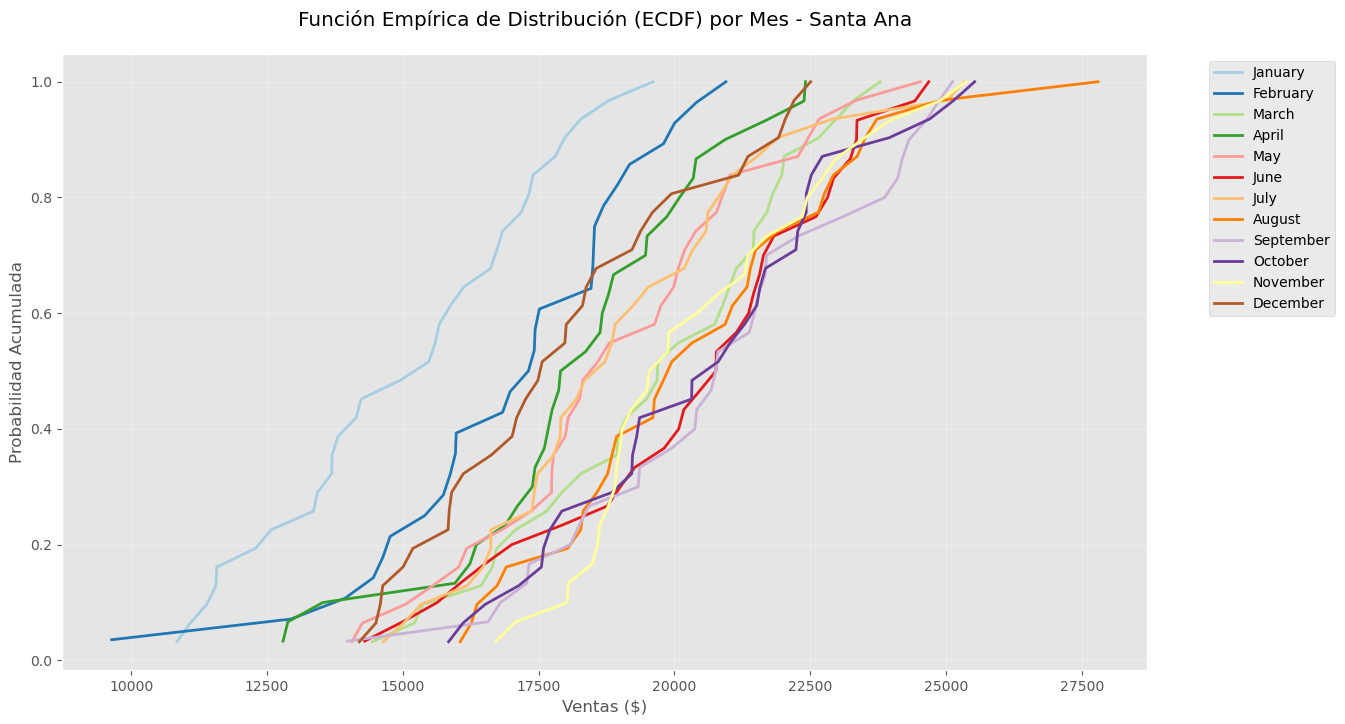

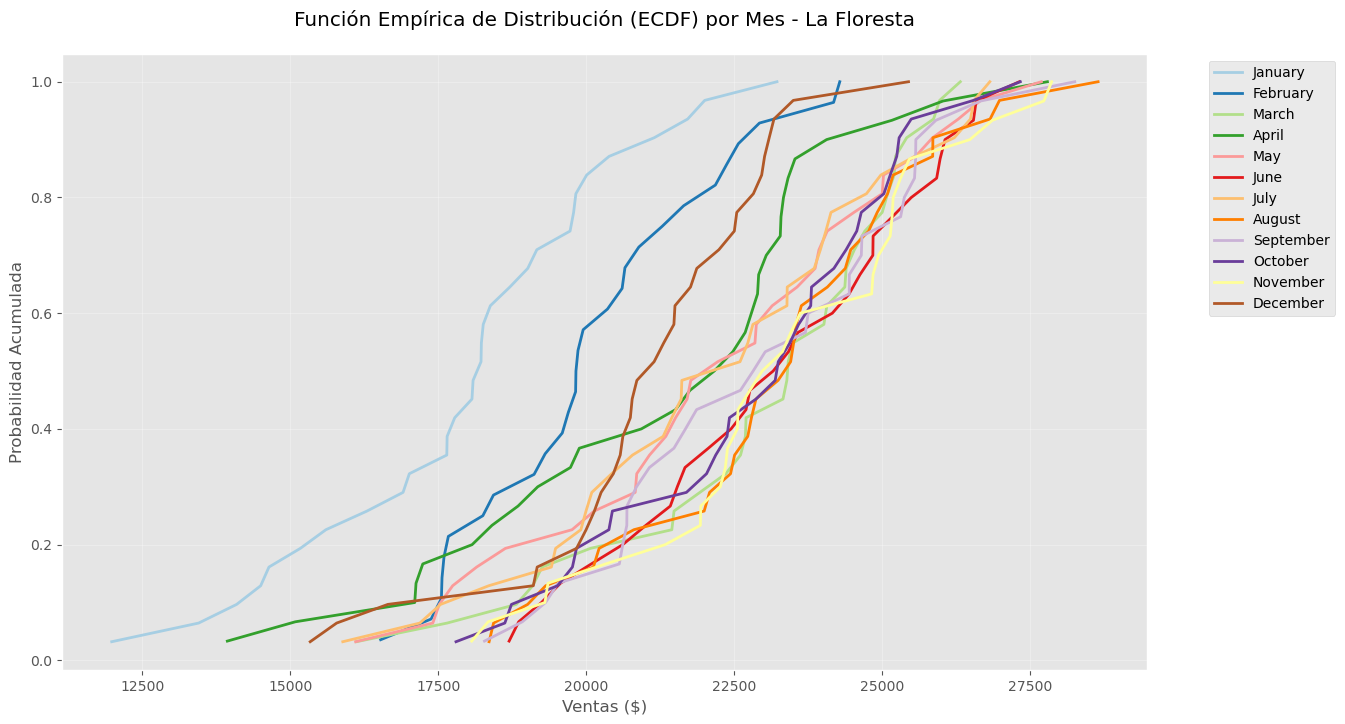

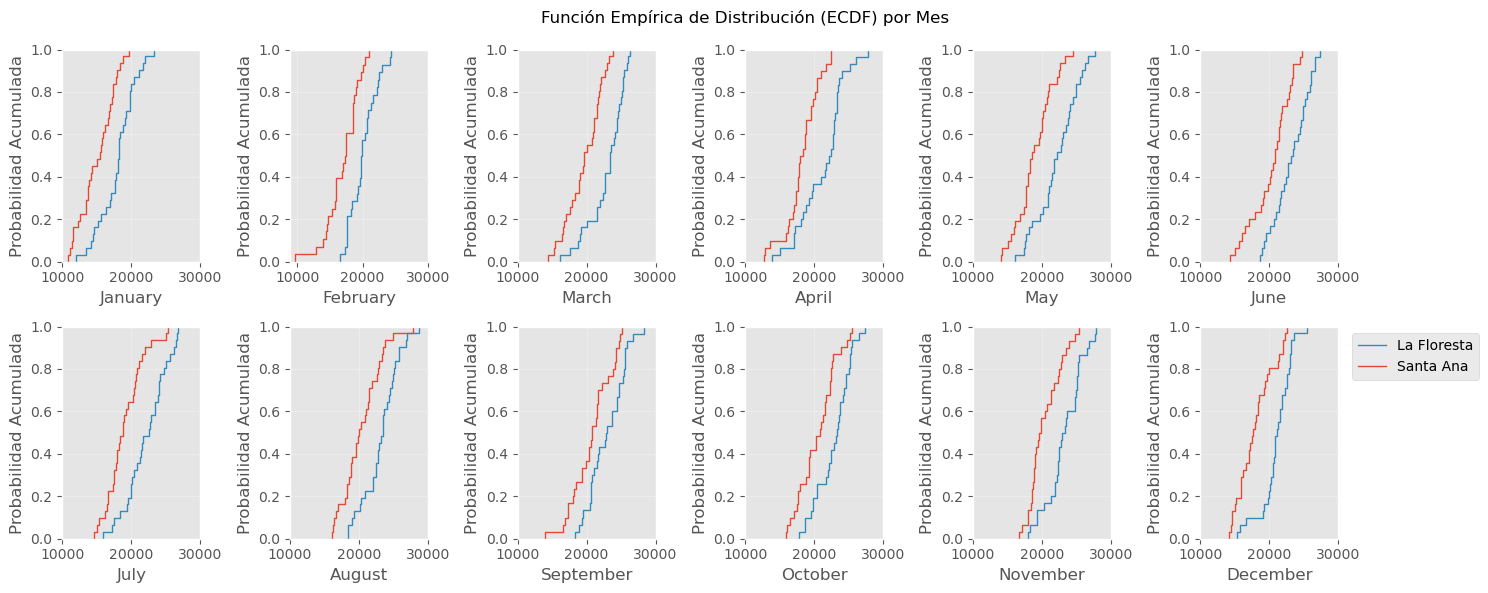

In [2]:
palette12 = sns.color_palette('Paired', n_colors=12)

def calcular_ecdf(datos):
    """Calcula la ECDF para un conjunto de datos"""
    x = np.sort(datos)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

def graficar_ecdf_mensual(df, tienda):
    plt.figure(figsize=(14, 8))
    meses = sorted(df['Mes'].unique())
    
    for mes in meses:
        ventas_mes = df[df['Mes'] == mes]['Ventas']
        x, y = calcular_ecdf(ventas_mes)
        plt.plot(x, y, label=f'{calendar.month_name[mes]}', linewidth=2, color=palette12[mes-1])
    
    plt.title(f'Función Empírica de Distribución (ECDF) por Mes - {tienda}', pad=20)
    plt.xlabel('Ventas ($)', fontsize=12)
    plt.ylabel('Probabilidad Acumulada', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()

# Graficar para ambas tiendas
graficar_ecdf_mensual(santa_ana, 'Santa Ana')
graficar_ecdf_mensual(la_floresta, 'La Floresta')

def graficar_ecdf_mensual_comparativo(df):
    fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 6))
    meses = sorted(df['Mes'].unique())
    for mes in meses:
        ventas_mes = df[df['Mes'] == mes]
        ax_mes=ax[((mes-1)//6)][(mes-1)%6]
        sns.ecdfplot(ventas_mes, hue='Tienda', legend=False, x='Ventas', linewidth=1, ax=ax_mes)
        ax_mes.set_xlabel(calendar.month_name[mes])
        ax_mes.set_ylabel('Probabilidad Acumulada')
        ax_mes.set_xticks(range(10000, 30001, 10000))
        ax_mes.grid(True, alpha=0.3)

    plt.suptitle(f'Función Empírica de Distribución (ECDF) por Mes')
    plt.legend(['La Floresta', 'Santa Ana'], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Graficar comparativo por mes
graficar_ecdf_mensual_comparativo(ventas_combinadas)

## Interpretación de Función de densidad

* La Floresta:

    Ventas más altas en promedio, pero con mayor variabilidad (no es más estable).

    Alto desempeño en meses pico, pero depende de eventos excepcionales (colas extendidas hacia valores altos).

* Santa Ana:

    Menor variabilidad relativa, pero con mínimos más bajos (riesgo de días malos).

    Volatilidad percibida por su dependencia de días puntuales para compensar los mínimos.

* Conclusión Clave:

    Si buscamos consistencia absoluta, Santa Ana es ligeramente mejor (menor desviación estándar).

    Si preferimos maximizar ventas (aceptando altibajos), La Floresta es la opción, pero no es "más estable".



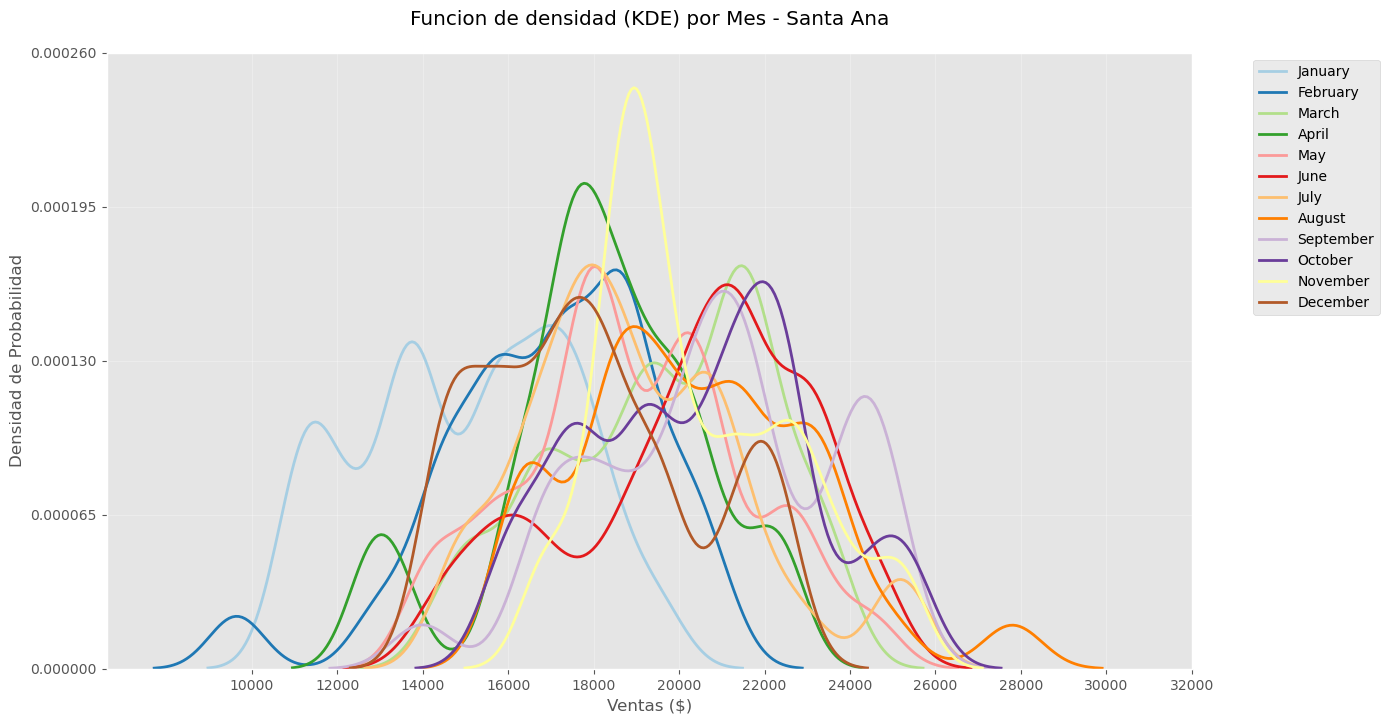

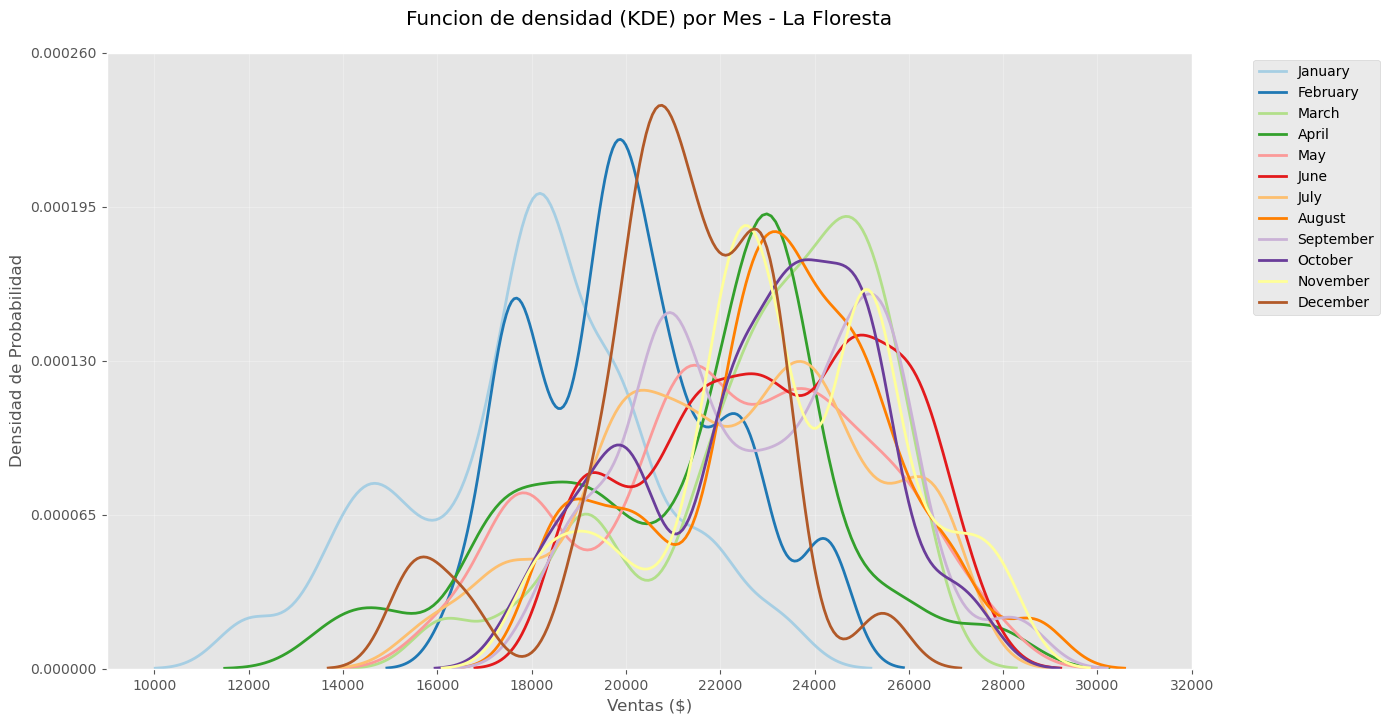

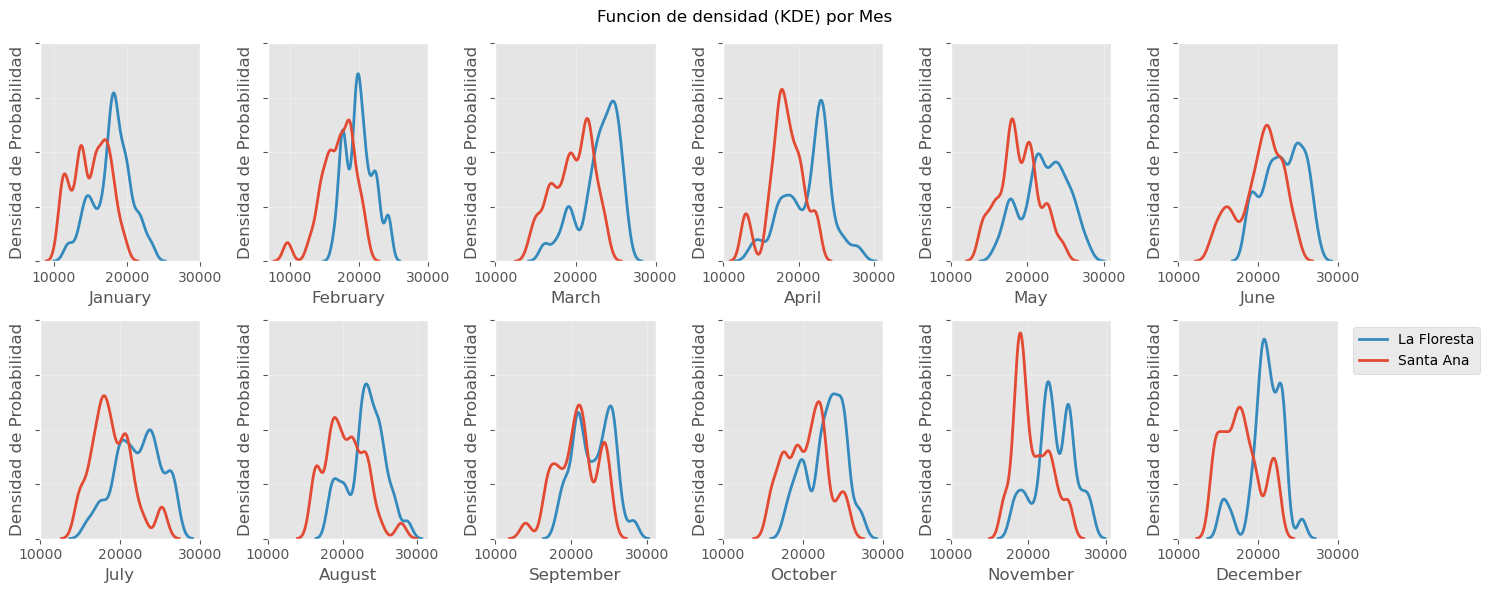

In [3]:
def graficar_kde_mensual(df, tienda):
    plt.figure(figsize=(14, 8))
    meses = sorted(df['Mes'].unique())
    
    for mes in meses:
        ventas_mes = df[df['Mes'] == mes]['Ventas']
        sns.kdeplot(ventas_mes, 
                   label=f'{calendar.month_name[mes]}',
                   linewidth=2,
                   bw_adjust=0.5, # Ajuste de suavizado
                   color=palette12[mes-1])
    
    plt.title(f'Funcion de densidad (KDE) por Mes - {tienda}', pad=20)
    plt.xlabel('Ventas ($)', fontsize=12)
    plt.ylabel('Densidad de Probabilidad', fontsize=12)
    plt.xticks(range(10000, 32001, 2000))
    plt.yticks(np.linspace(0, .00026, 5))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()

# Graficar para ambas tiendas
graficar_kde_mensual(santa_ana, 'Santa Ana')
graficar_kde_mensual(la_floresta, 'La Floresta')

def graficar_kde_mensual_comparativo(df):
    fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15, 6))
    meses = sorted(df['Mes'].unique())
    for mes in meses:
        ventas_mes = df[df['Mes'] == mes]
        ax_mes=ax[((mes-1)//6)][(mes-1)%6]
        sns.kdeplot(ventas_mes,
                    hue='Tienda',
                    legend=False,
                    x='Ventas',
                    linewidth=2,
                    bw_adjust=0.5, # Ajuste de suavizado
                    color=palette12[mes-1],
                    ax=ax_mes)
        ax_mes.set_xlabel(calendar.month_name[mes])
        ax_mes.set_ylabel('Densidad de Probabilidad')
        ax_mes.set_xticks(range(10000, 30001, 10000))
        ax_mes.set_yticks(np.linspace(0, .00013, 5))
        ax_mes.set_yticklabels([])
        ax_mes.grid(True, alpha=0.3)

    plt.suptitle(f'Funcion de densidad (KDE) por Mes')
    plt.legend(['La Floresta', 'Santa Ana'], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Graficar comparativo por mes
graficar_kde_mensual_comparativo(ventas_combinadas)

### Analisis de ventas mensuales promedio

1- **Don Francisco necesita saber en que mes se puede tomar unas vacaciones. También necesita saber en qué mes las ventas
serían mejores para embarcarse en una inversión importante. Por ello le pregunta a Matías, ¿cómo se comportan las
ventas en cada mes?**

Con los datos visualizados en el consolidado de ambas sucursales, podemos determinar que enero es el mes con menor probabilidad de ventas.  

Nuestras predicciones calculan que las ventas totales de enero para el año próximo estarán entre 31601.60 y 34378.23 con una probabilidad del 95%, y entre 31162.44 y 34817.40 con una probabilidad del 99%.  
Analizando estos intervalos, vemos que el margen superior de enero, esta incluso por debajo del próximo inferior (febrero), con lo cual se concluye que las probabilidades de ser el mes con menor volumen de ventas son muy altas.  

> Con estos valores, indicamos a don Francisco que el mes para tomarse vacaciones debería ser enero.

Observando ahora el mes de mejores ventas, se evidencia que junio, agosto, septiembre, octubre y noviembre tienen un volumen de ventas similar.  
Profundizando sobre esos meses, se ve que el mes con mejor promedio de ventas es noviembre, superando levemente a septiembre.  

> Sin embargo, al observar entre agosto y noviembre una tendencia sostenida de ventas, con niveles similares, podemos recomendar a don Francisco que realice la inversión para septiembre, segundo mes con mejor volumen de ventas, ya que ante el improbable caso que las ventas no lleguen al nivel esperado, las probabilidades de que los siguientes 3 meses sean buenos es muy alta.  
Aunque de decidir realizar la inversión solo en el mejor mes, deberá realizarla en noviembre.




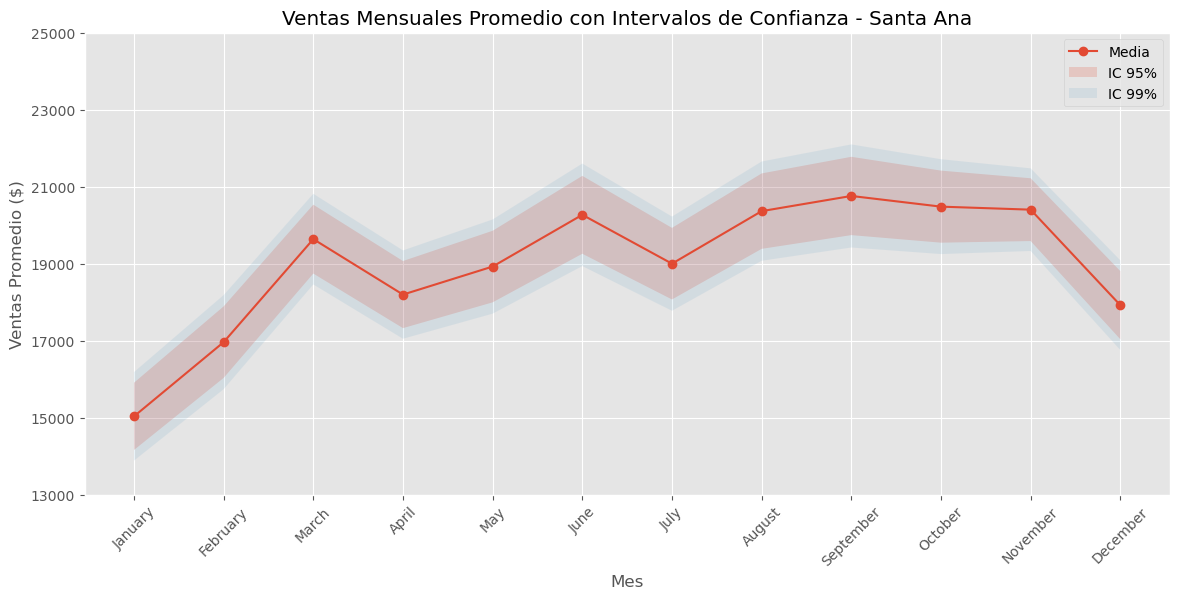

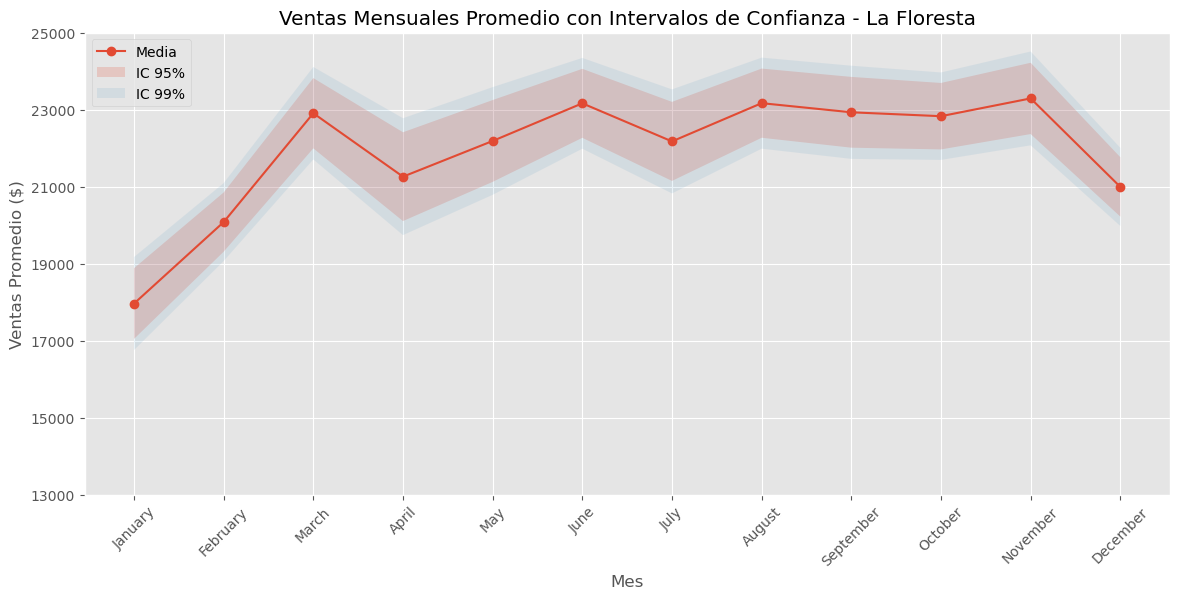

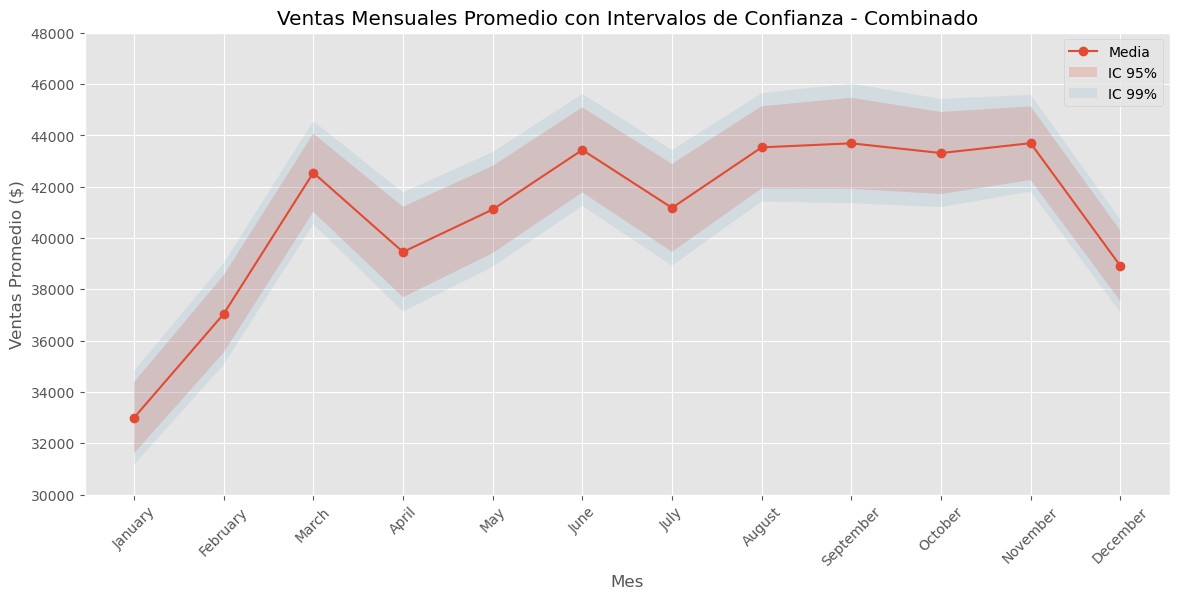

Ventas mensuales - Santa Ana:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Mes,Nombre_Mes,,,,,
1,January,13880.29,14156.69,15030.48,15904.26,16180.66
2,February,15735.86,16029.70,16958.63,17887.55,18181.40
3,March,18457.17,18740.19,19634.91,20529.64,20812.66
4,April,17046.75,17322.48,18194.13,19065.79,19341.52
5,May,17698.49,17992.53,18922.06,19851.59,20145.62
6,June,18934.48,19254.46,20266.02,21277.58,21597.56
7,July,17773.04,18067.12,18996.79,19926.46,20220.54
8,August,19072.09,19381.94,20361.49,21341.04,21650.89
9,September,19416.84,19738.58,20755.72,21772.85,22094.60



Ventas mensuales - La Floresta:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Mes,Nombre_Mes,,,,,
1,January,16750.59,17041.09,17959.44,18877.80,19168.30
2,February,19064.37,19307.68,20076.86,20846.04,21089.35
3,March,21703.56,21992.23,22904.78,23817.34,24106.00
4,April,19738.30,20103.19,21256.73,22410.26,22775.15
5,May,20785.16,21121.29,22183.90,23246.51,23582.64
6,June,21982.53,22265.96,23161.95,24057.94,24341.37
7,July,20821.29,21146.04,22172.67,23199.30,23524.05
8,August,21983.20,22267.43,23165.97,24064.52,24348.75
9,September,21718.51,22009.33,22928.70,23848.08,24138.90



Ventas mensuales - Combinado:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Mes,Nombre_Mes,,,,,
1,January,31162.44,31601.60,32989.92,34378.23,34817.40
2,February,35054.68,35530.68,37035.48,38540.28,39016.29
3,March,40531.38,41014.00,42539.70,44065.40,44548.02
4,April,37129.68,37687.48,39450.86,41214.24,41772.04
5,May,38870.35,39407.59,41105.96,42804.32,43341.56
6,June,41246.28,41770.56,43427.97,45085.37,45609.65
7,July,38915.02,39456.79,41169.46,42882.14,43423.90
8,August,41418.33,41925.18,43527.46,45129.75,45636.60
9,September,41350.98,41911.73,43684.42,45457.12,46017.87


In [3]:
# Análisis por Mes Ventas mensuales promedio
def analisis_mensual(data, tienda):
    # Agrupar por mes
    ventas_mensuales = data.groupby(['Mes', 'Nombre_Mes'])['Ventas'].agg(['mean', 'std', 'count'])
    
    # Calcular intervalos de confianza
    #Límite Inferior = Media - (Z * Error Estándar)
    #Error Estándar = std/√n
    #Z = 1.96 (para 95% de confianza)
    #Área bajo la curva normal:
    #±1.96σ cubre 95% de los casos
    #±2.58σ cubre 99% de los casos


    ventas_mensuales['IC_95_inf'] = ventas_mensuales['mean'] - 1.96*ventas_mensuales['std']/np.sqrt(ventas_mensuales['count'])
    ventas_mensuales['IC_95_sup'] = ventas_mensuales['mean'] + 1.96*ventas_mensuales['std']/np.sqrt(ventas_mensuales['count'])
    ventas_mensuales['IC_99_inf'] = ventas_mensuales['mean'] - 2.58*ventas_mensuales['std']/np.sqrt(ventas_mensuales['count'])
    ventas_mensuales['IC_99_sup'] = ventas_mensuales['mean'] + 2.58*ventas_mensuales['std']/np.sqrt(ventas_mensuales['count'])
    
    # Ordenar por mes
    ventas_mensuales = ventas_mensuales.sort_index()
    
    # Gráfico
    plt.figure(figsize=(14, 6))
    plt.plot(ventas_mensuales.index.get_level_values('Nombre_Mes'), ventas_mensuales['mean'], 
             label='Media', marker='o')
    plt.fill_between(ventas_mensuales.index.get_level_values('Nombre_Mes'), 
                     ventas_mensuales['IC_95_inf'], ventas_mensuales['IC_95_sup'],
                     alpha=0.2, label='IC 95%')
    plt.fill_between(ventas_mensuales.index.get_level_values('Nombre_Mes'), 
                     ventas_mensuales['IC_99_inf'], ventas_mensuales['IC_99_sup'],
                     alpha=0.1, label='IC 99%')
    plt.title(f'Ventas Mensuales Promedio con Intervalos de Confianza - {tienda}')
    plt.xlabel('Mes')
    plt.ylabel('Ventas Promedio ($)')
    plt.xticks(rotation=45)
    if str.lower(tienda)=='combinado':
        plt.yticks(range(30000, 48001, 2000))
    else:
        plt.yticks(range(13000, 25001, 2000))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return ventas_mensuales

# Analizar ambas tiendas
ventas_mensuales_sa = analisis_mensual(santa_ana, 'Santa Ana')
ventas_mensuales_lf = analisis_mensual(la_floresta, 'La Floresta')
ventas_mensuales_combinado = analisis_mensual(ventas_combinadas.groupby(["Fecha", "Mes", "Nombre_Mes"])["Ventas"].sum().reset_index(), "Combinado")

# Mostrar resultados
print("Ventas mensuales - Santa Ana:")
display(np.round(ventas_mensuales_sa[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))
print("\nVentas mensuales - La Floresta:")
display(np.round(ventas_mensuales_lf[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))
print("\nVentas mensuales - Combinado:")
display(np.round(ventas_mensuales_combinado[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))


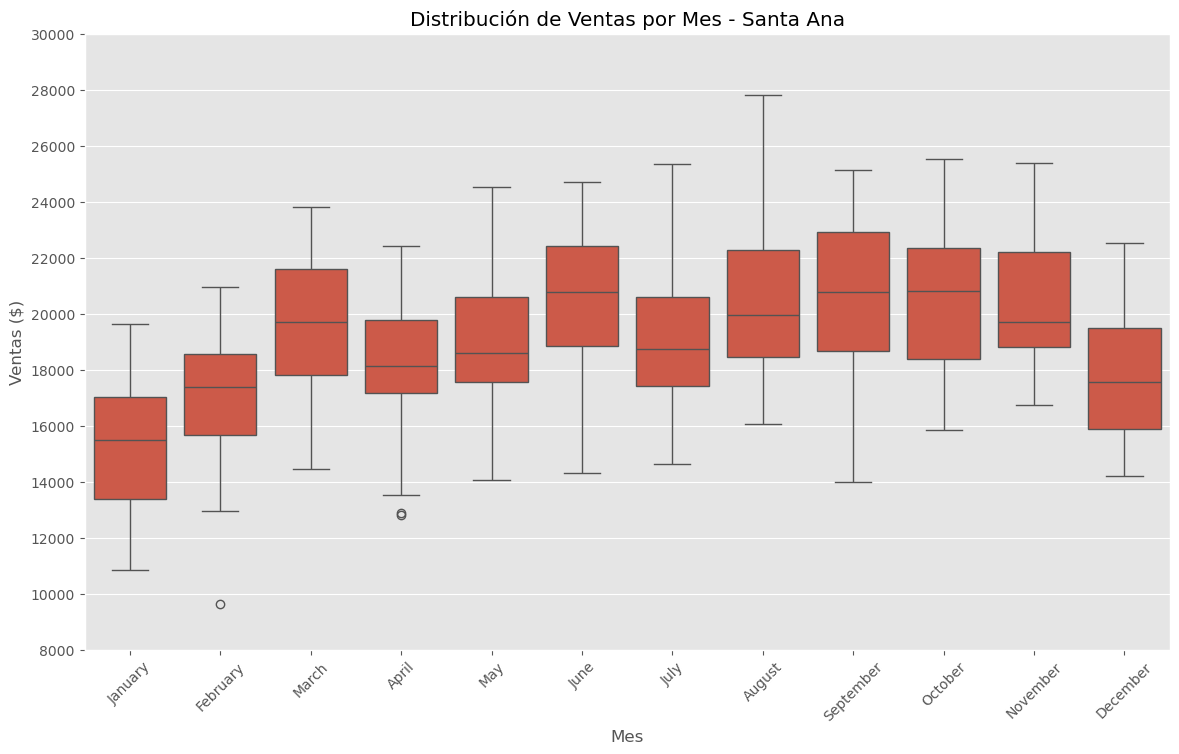

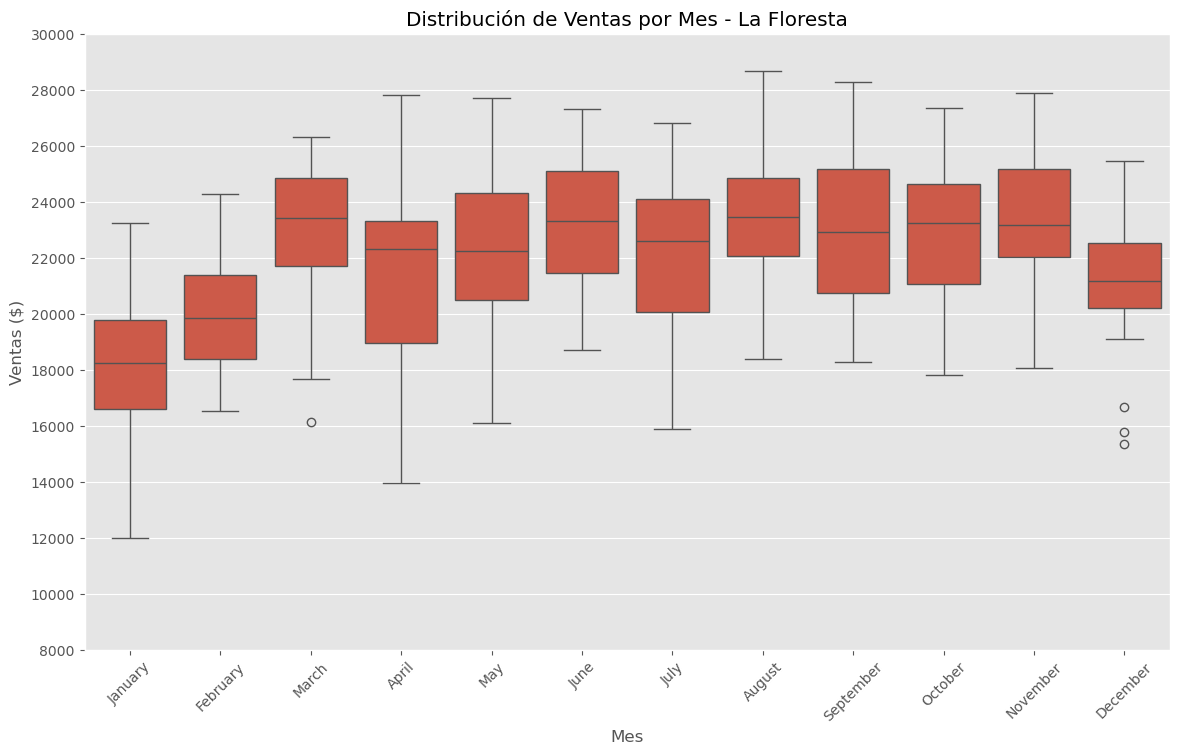

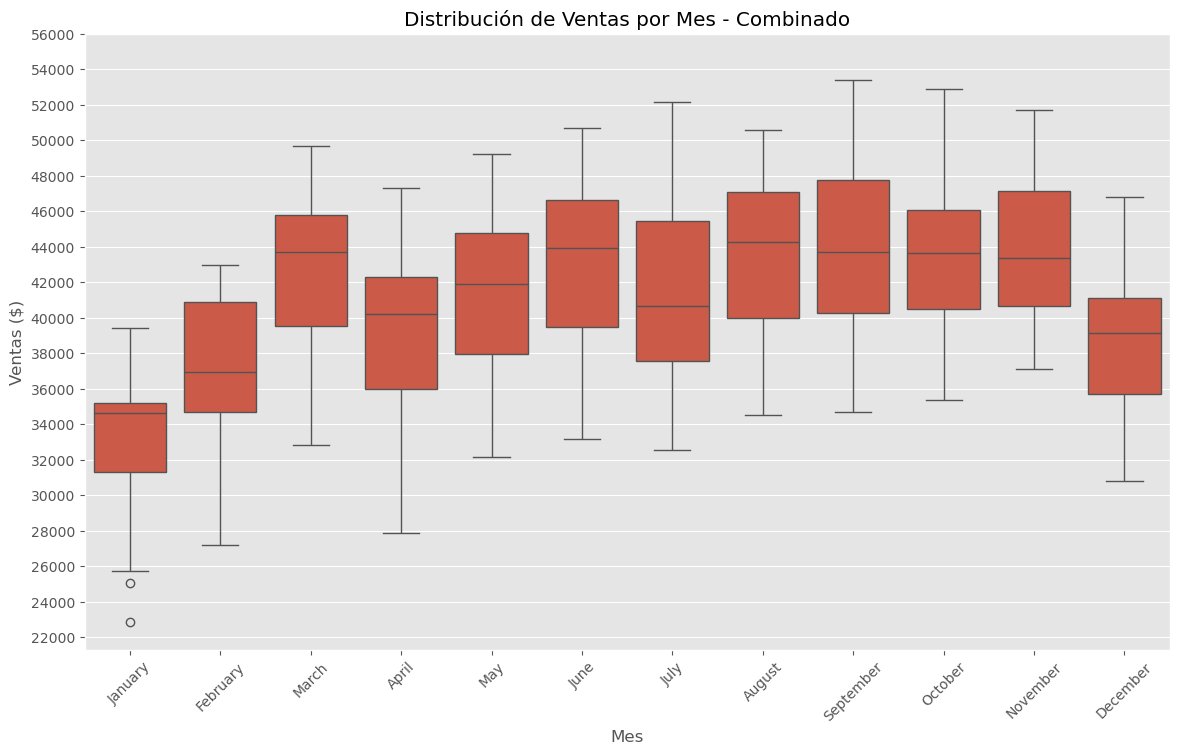

In [5]:
#Distribución de Ventas por Mes
def plot_distribucion_mensual(data, tienda):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Nombre_Mes', y='Ventas', data=data, order=calendar.month_name[1:13])
    plt.title(f'Distribución de Ventas por Mes - {tienda}')
    plt.xlabel('Mes')
    plt.ylabel('Ventas ($)')
    plt.xticks(rotation=45)
    if str.lower(tienda)=='combinado':
        plt.yticks(range(22000, 56001, 2000))
    else:
        plt.yticks(range(8000, 30001, 2000))
    plt.show()

plot_distribucion_mensual(santa_ana, 'Santa Ana')
plot_distribucion_mensual(la_floresta, 'La Floresta')
plot_distribucion_mensual(ventas_combinadas.groupby(["Fecha", "Mes", "Nombre_Mes"])["Ventas"].sum().reset_index(), 'Combinado')


### Interpretación de las funciones de distribución por día ECDF

* El eje X muestra el monto de ventas

* El eje Y muestra la probabilidad acumulada (de 0 a 1)

* Curvas desplazadas a la derecha indican días con ventas más altas: Se puede apreciar en los gráficos que el día domingo esta muy separado del resto.  
  A su vez, lunes y sabado tambien se aprecian separados del resto. 

Pendientes pronunciadas indican menor variabilidad en ventas



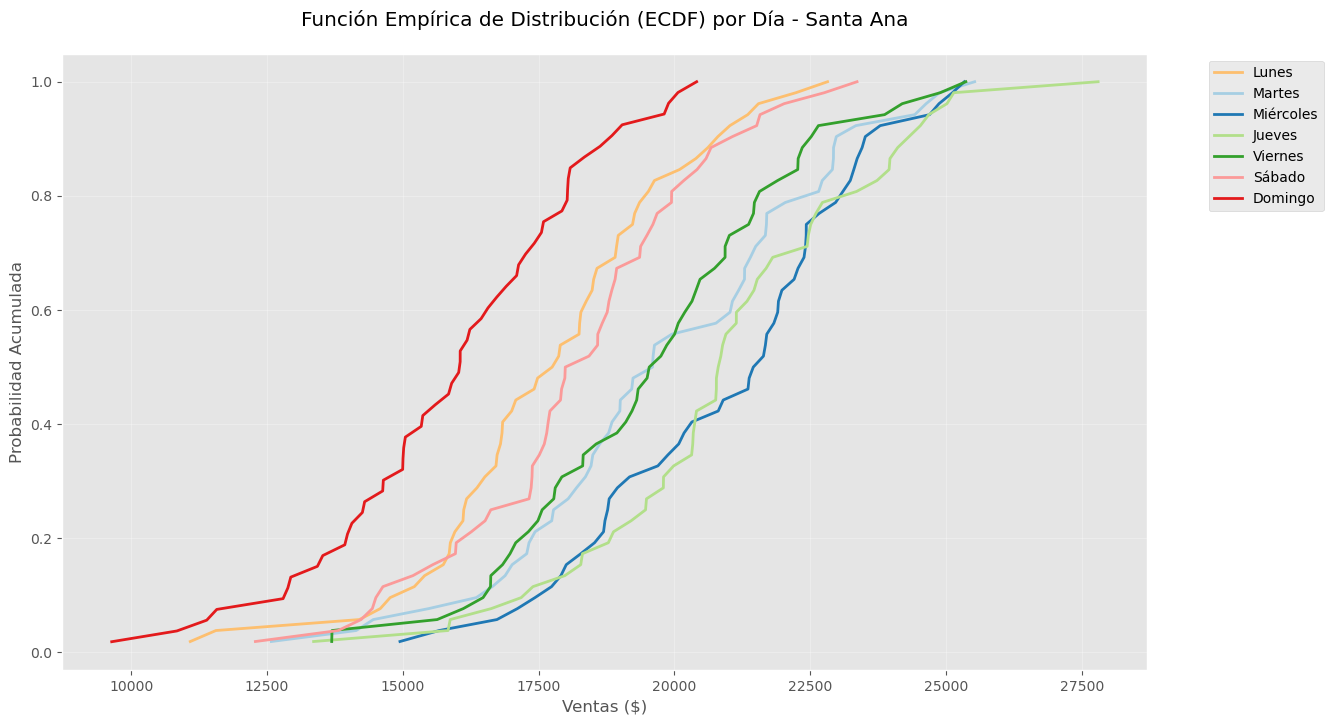

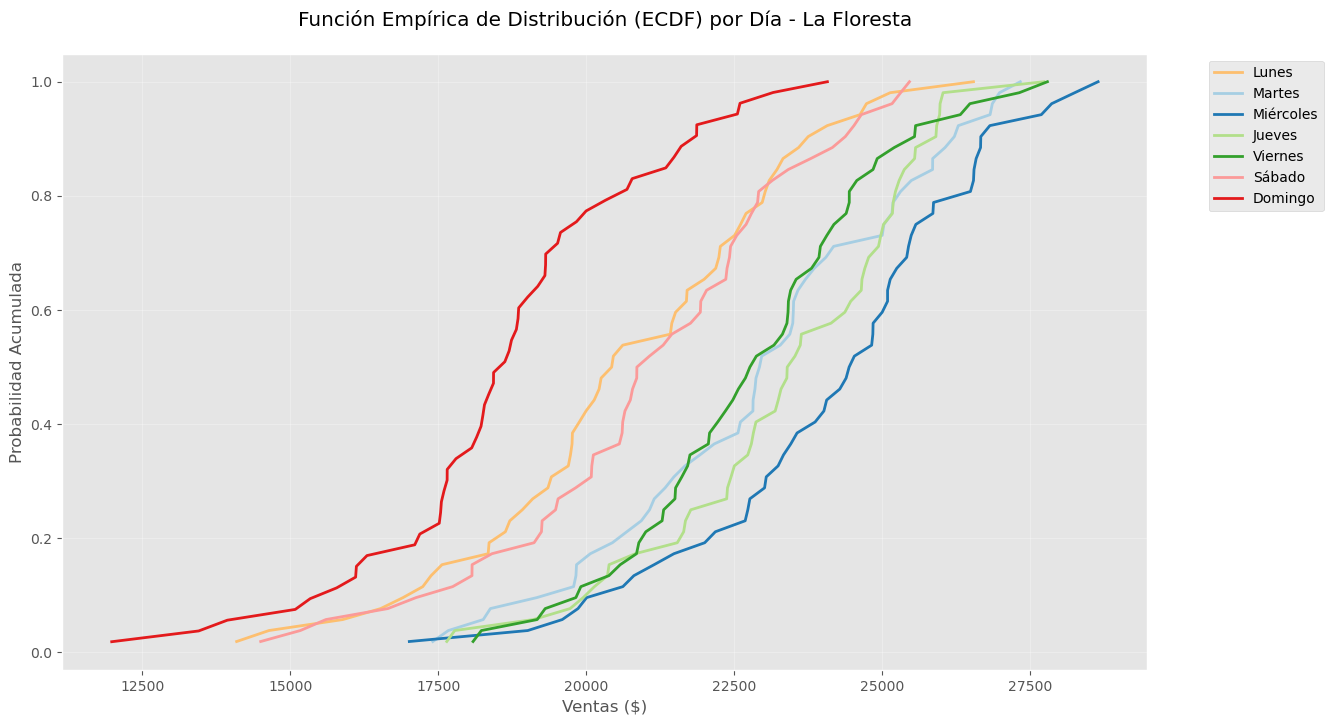

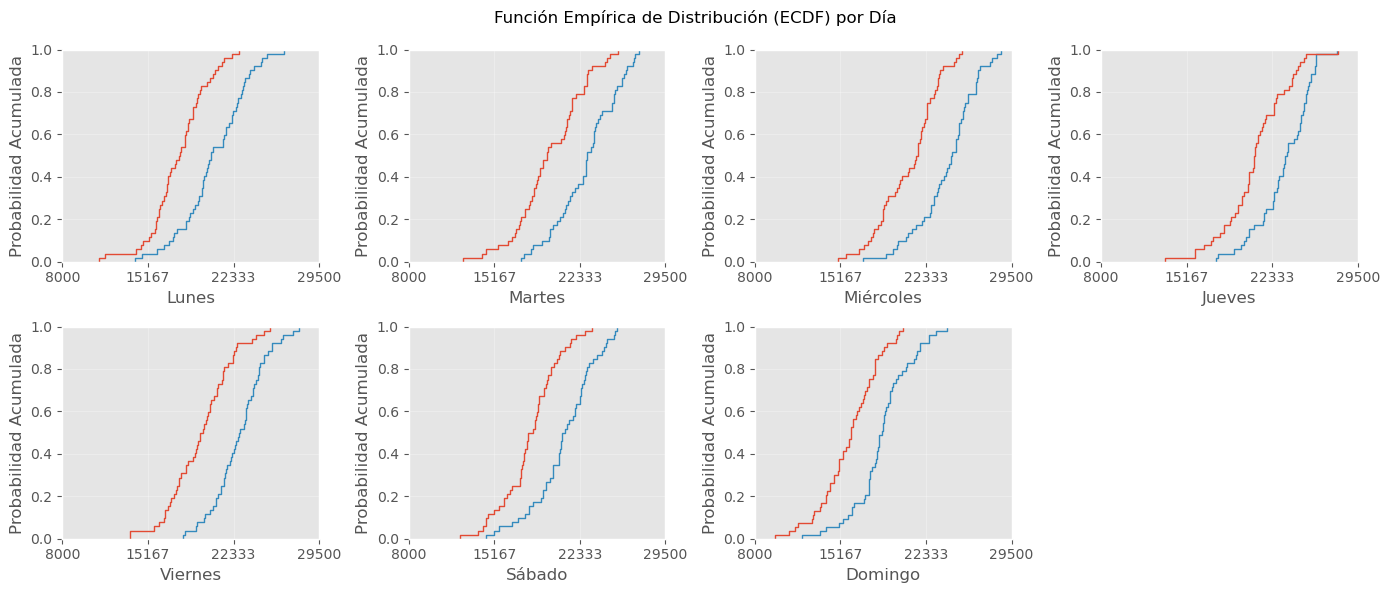

In [6]:
palette7 = sns.color_palette('Paired', n_colors=7)
# Orden de días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

def graficar_ecdf_diaria(df, tienda):
    plt.figure(figsize=(14, 8))
    dias = sorted(df['Dia_Semana'].unique())
    
    for dia in dias:
        ventas_dia = df[df['Dia_Semana'] == dia]['Ventas']
        x, y = calcular_ecdf(ventas_dia)
        plt.plot(x, y, label=nombres_dias[dia], linewidth=2, color=palette7[dia-1])
    
    plt.title(f'Función Empírica de Distribución (ECDF) por Día - {tienda}', pad=20)
    plt.xlabel('Ventas ($)', fontsize=12)
    plt.ylabel('Probabilidad Acumulada', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()

# Graficar para ambas tiendas
graficar_ecdf_diaria(santa_ana, 'Santa Ana')
graficar_ecdf_diaria(la_floresta, 'La Floresta')

def graficar_ecdf_diario_comparativo(df):
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))
    dias = sorted(df['Dia_Semana'].unique())
    for dia in dias:
        ventas_dia = df[df['Dia_Semana'] == dia]
        ax_dia=ax[(dia//4)][dia%4]
        sns.ecdfplot(ventas_dia, hue='Tienda', legend=False, x='Ventas', linewidth=1, ax=ax_dia)
        ax_dia.set_xlabel(nombres_dias[dia])
        ax_dia.set_ylabel('Probabilidad Acumulada')
        ax_dia.set_xticks(np.linspace(8000, 29500, 4))
        ax_dia.grid(True, alpha=0.3)

    ax[1, 3].set_visible(False)
    plt.suptitle(f'Función Empírica de Distribución (ECDF) por Día')
    plt.legend(['La Floresta', 'Santa Ana'], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Graficar comparativo por dia
graficar_ecdf_diario_comparativo(ventas_combinadas)

## Interpretación de Función de densidad por día

Se observan en La Floresta campanas con picos mas a la derecha, eso es, ventas mayores que Santa Ana en todos los días.


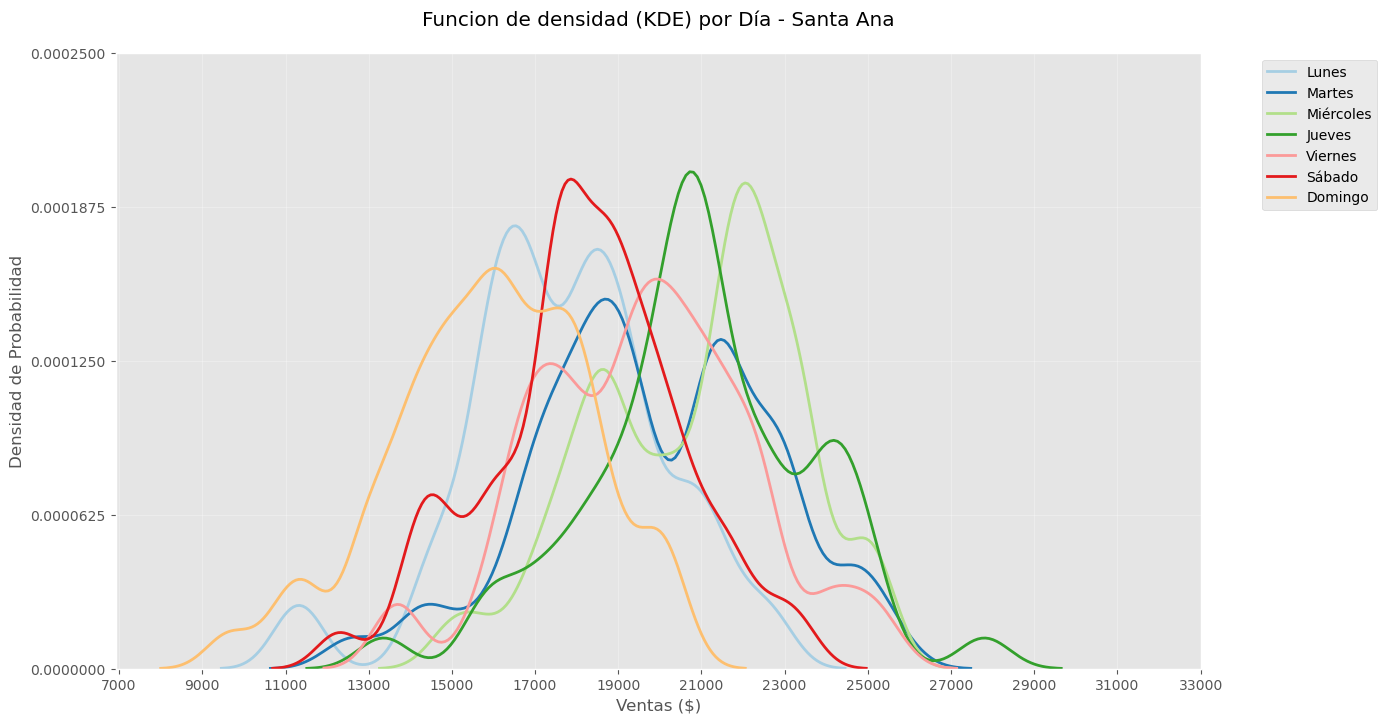

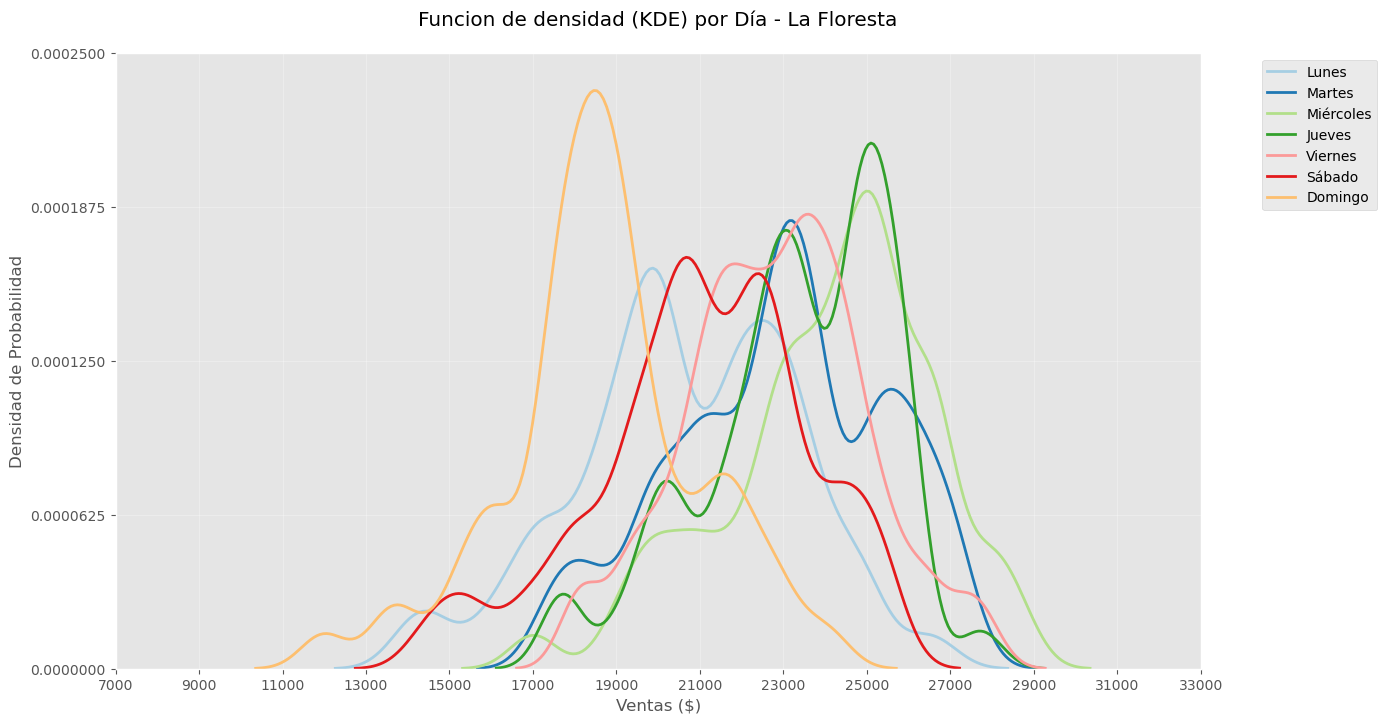

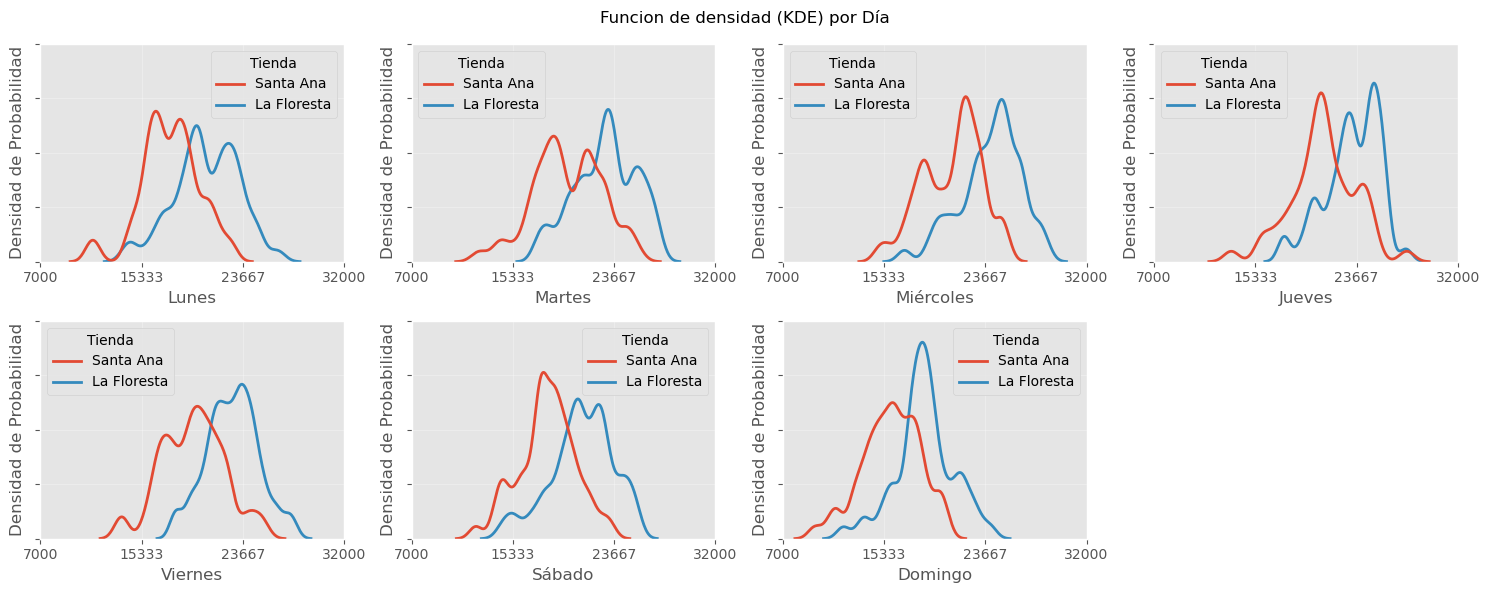

In [7]:
def graficar_kde_diario(df, tienda):
    plt.figure(figsize=(14, 8))
    dias = sorted(df['Dia_Semana'].unique())
    
    for dia in dias:
        ventas_dia = df[df['Dia_Semana'] == dia]['Ventas']
        sns.kdeplot(ventas_dia, 
                   label=nombres_dias[dia],
                   linewidth=2,
                   bw_adjust=0.5, # Ajuste de suavizado
                   color=palette7[dia])
    
    plt.title(f'Funcion de densidad (KDE) por Día - {tienda}', pad=20)
    plt.xlabel('Ventas ($)', fontsize=12)
    plt.ylabel('Densidad de Probabilidad', fontsize=12)
    plt.xticks(range(7000, 33001, 2000))
    plt.yticks(np.linspace(0, .00025, 5))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()

# Graficar para ambas tiendas
graficar_kde_diario(santa_ana, 'Santa Ana')
graficar_kde_diario(la_floresta, 'La Floresta')

def graficar_kde_diario_comparativo(df):
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
    dias = sorted(df['Dia_Semana'].unique())
    for dia in dias:
        ventas_dia = df[df['Dia_Semana'] == dia]
        ax_dia=ax[(dia//4)][dia%4]
        sns.kdeplot(ventas_dia,
                    hue='Tienda',
                    legend=True,
                    x='Ventas',
                    linewidth=2,
                    bw_adjust=0.5, # Ajuste de suavizado
                    color=palette7[dia],
                    ax=ax_dia)
        ax_dia.set_xlabel(nombres_dias[dia])
        ax_dia.set_ylabel('Densidad de Probabilidad')
        ax_dia.set_xticks(np.linspace(7000, 32000, 4))
        ax_dia.set_yticks(np.linspace(0, .00013, 5))
        ax_dia.set_yticklabels([])
        ax_dia.grid(True, alpha=0.3)

    ax[1,3].set_visible(False)
    plt.suptitle(f'Funcion de densidad (KDE) por Día')
    plt.legend(['La Floresta', 'Santa Ana'], bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Graficar comparativo por dia
graficar_kde_diario_comparativo(ventas_combinadas)

### Analisis de ventas semanales promedio

2- **De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atención de sus supermercados a lo
largo de la semana; también debe decidir en que días debe contratar más empleados y en que dıas podría contratar
menos. Por ello pregunta, ¿cómo se comportan las ventas en cada día de la semana?**

Analizando las ventas por cada día de la semana, podemos concluir con buena probabilidad, que el volumen de ventas es superior los miércoles.  
Le siguen en orden decreciente los jueves, martes y viernes.  

Considerando las ventas totales, los días mencionados tienen volúmenes superiores a 40000, tanto en valores medios como en intervalos de confianza de 95% y 99%.  
El resto de los días tienen ventas medias por debajo de los 40000, y solo el sábado logra superar levemente dicho valor en sus intervalos superiores de confianza.

> Es por estos motivos que nuestra recomendación para don Francisco es contratar **más empleados** los miércoles, aunque también podría evaluar contratar más empleados los jueves, martes y viernes.  
  Es decir, de martes a viernes.  

Por debajo, con peor volumen de ventas, se encuentra el domingo, cuyo intervalo de confianza superior es menor al intervalo inferior del siguiente día con peores ventas (lunes).  
Siguiendo en orden ascendente, se encuentran los lunes y sábados, este último, con un volumen levemente superior.  

> En base a esto, sería una decisión correcta, según los datos analizados, contratar **menos empleados** el domingo.  
  De necesitar reducir aún más días, lunes y sábados son buenos candidatos también.  
  Es decir, menos empleados de sábado a lunes.



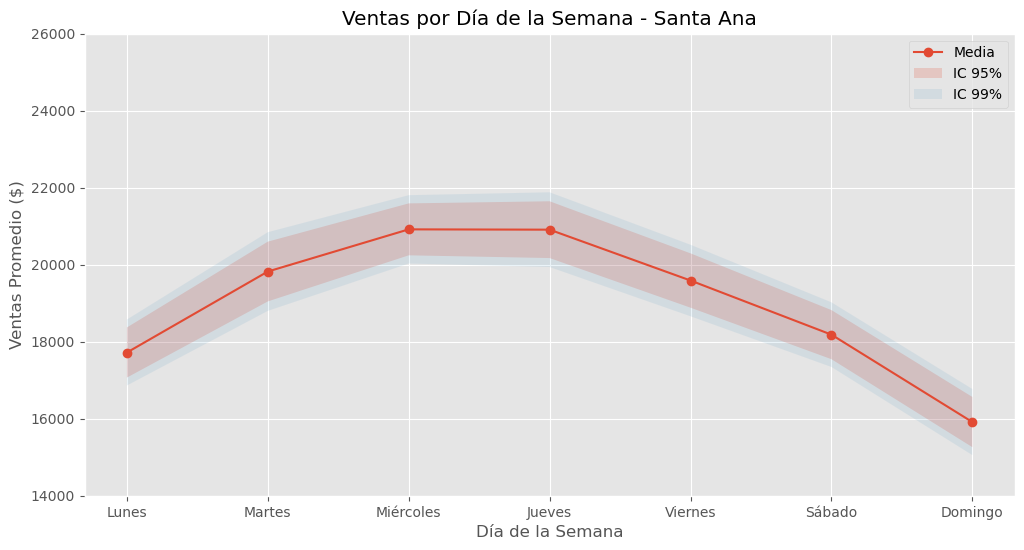

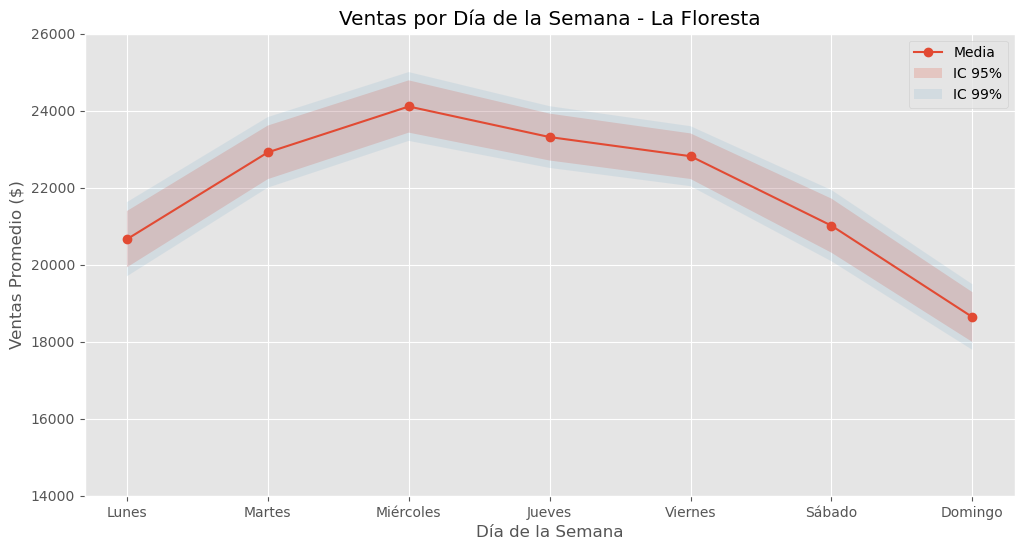

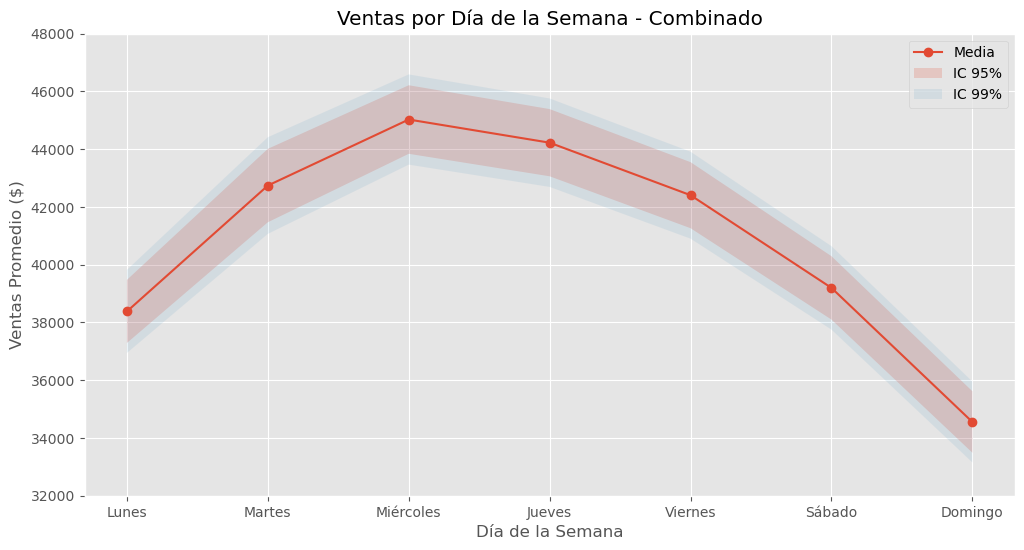

Ventas por día - Santa Ana:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Dia_Semana,Nombre_Dia,,,,,
0,Monday,16862.77,17068.71,17719.76,18370.80,18576.74
1,Tuesday,18801.35,19046.91,19823.19,20599.47,20845.03
2,Wednesday,20030.95,20244.29,20918.72,21593.15,21806.49
3,Thursday,19939.61,20172.94,20910.55,21648.16,21881.49
4,Friday,18660.39,18883.63,19589.35,20295.07,20518.31
5,Saturday,17343.59,17545.40,18183.38,18821.36,19023.17
6,Sunday,15054.51,15260.82,15913.01,16565.20,16771.51



Ventas por día - La Floresta:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Dia_Semana,Nombre_Dia,,,,,
0,Monday,19699.35,19930.83,20662.58,21394.34,21625.81
1,Tuesday,22002.35,22222.52,22918.54,23614.57,23834.74
2,Wednesday,23216.04,23430.82,24109.78,24788.74,25003.52
3,Thursday,22513.90,22706.59,23315.74,23924.89,24117.58
4,Friday,22039.27,22226.57,22818.68,23410.79,23598.09
5,Saturday,20089.34,20311.63,21014.36,21717.09,21939.38
6,Sunday,17788.33,17993.12,18640.55,19287.97,19492.77



Ventas por día - Combinado:


,,IC_99_inf,IC_95_inf,mean,IC_95_sup,IC_99_sup
Dia_Semana,Nombre_Dia,,,,,
0,Monday,36943.91,37289.58,38382.34,39475.10,39820.77
1,Tuesday,41067.80,41470.07,42741.74,44013.41,44415.67
2,Wednesday,43465.81,43841.34,45028.50,46215.66,46591.19
3,Thursday,42694.20,43062.37,44226.29,45390.20,45758.38
4,Friday,40902.27,41264.12,42408.03,43551.94,43913.79
5,Saturday,37752.38,38099.71,39197.74,40295.77,40643.10
6,Sunday,33152.37,33489.09,34553.56,35618.03,35954.75


In [8]:
#analisis de venta por día de semana

def analisis_diario_semana(data, tienda):
    # Agrupar por día de la semana
    ventas_diarias = data.groupby(['Dia_Semana', 'Nombre_Dia'])['Ventas'].agg(['mean', 'std', 'count'])
    ventas_diarias = ventas_diarias.reindex(dias_orden, level='Nombre_Dia')
    
    # Calcular intervalos de confianza
    ventas_diarias['IC_95_inf'] = ventas_diarias['mean'] - 1.96*ventas_diarias['std']/np.sqrt(ventas_diarias['count'])
    ventas_diarias['IC_95_sup'] = ventas_diarias['mean'] + 1.96*ventas_diarias['std']/np.sqrt(ventas_diarias['count'])
    ventas_diarias['IC_99_inf'] = ventas_diarias['mean'] - 2.58*ventas_diarias['std']/np.sqrt(ventas_diarias['count'])
    ventas_diarias['IC_99_sup'] = ventas_diarias['mean'] + 2.58*ventas_diarias['std']/np.sqrt(ventas_diarias['count'])
    
    # Gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(nombres_dias, ventas_diarias['mean'], label='Media', marker='o')
    plt.fill_between(nombres_dias, ventas_diarias['IC_95_inf'], ventas_diarias['IC_95_sup'],
                     alpha=0.2, label='IC 95%')
    plt.fill_between(nombres_dias, ventas_diarias['IC_99_inf'], ventas_diarias['IC_99_sup'],
                     alpha=0.1, label='IC 99%')
    plt.title(f'Ventas por Día de la Semana - {tienda}')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Ventas Promedio ($)')
    if str.lower(tienda)=='combinado':
        plt.yticks(range(32000, 48001, 2000))
    else:
        plt.yticks(range(14000, 26001, 2000))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return ventas_diarias

# Analizar ambas tiendas
ventas_diarias_sa = analisis_diario_semana(santa_ana, 'Santa Ana')
ventas_diarias_lf = analisis_diario_semana(la_floresta, 'La Floresta')
ventas_diarias_combinado = analisis_diario_semana(ventas_combinadas.groupby(["Fecha", "Dia_Semana", "Nombre_Dia"])["Ventas"].sum().reset_index(), "Combinado")

# Mostrar resultados
print("Ventas por día - Santa Ana:")
display(np.round(ventas_diarias_sa[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))
print("\nVentas por día - La Floresta:")
display(np.round(ventas_diarias_lf[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))
print("\nVentas por día - Combinado:")
display(np.round(ventas_diarias_combinado[['IC_99_inf', 'IC_95_inf', 'mean', 'IC_95_sup', 'IC_99_sup']], 2))


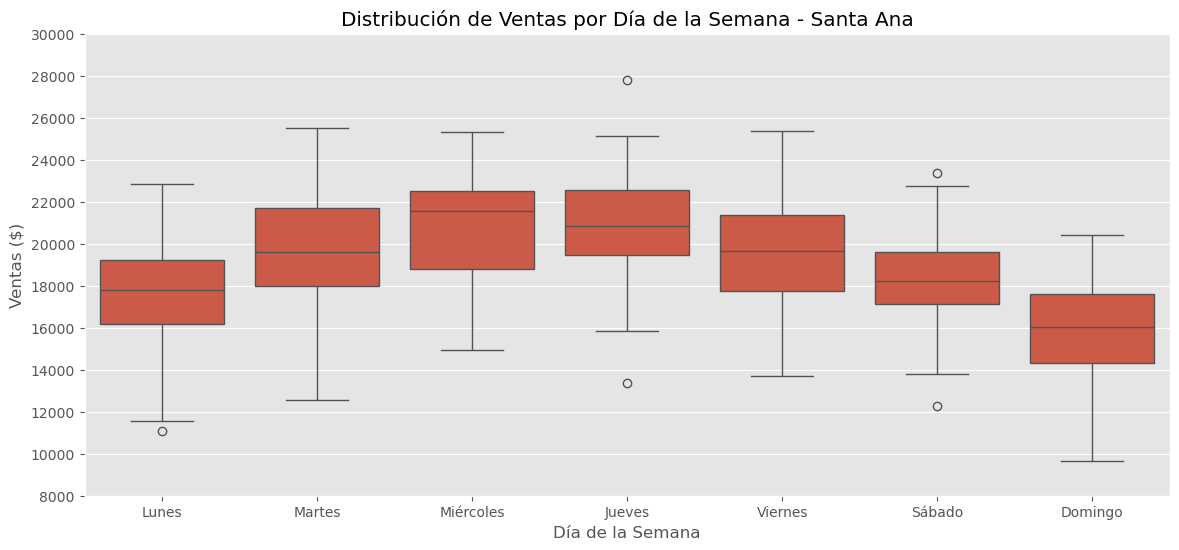

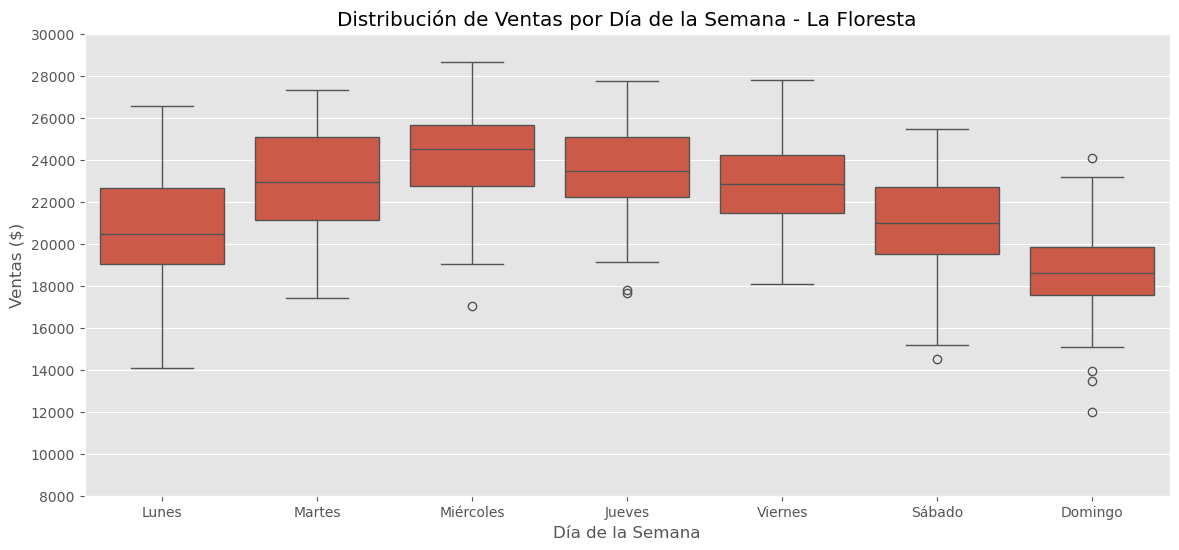

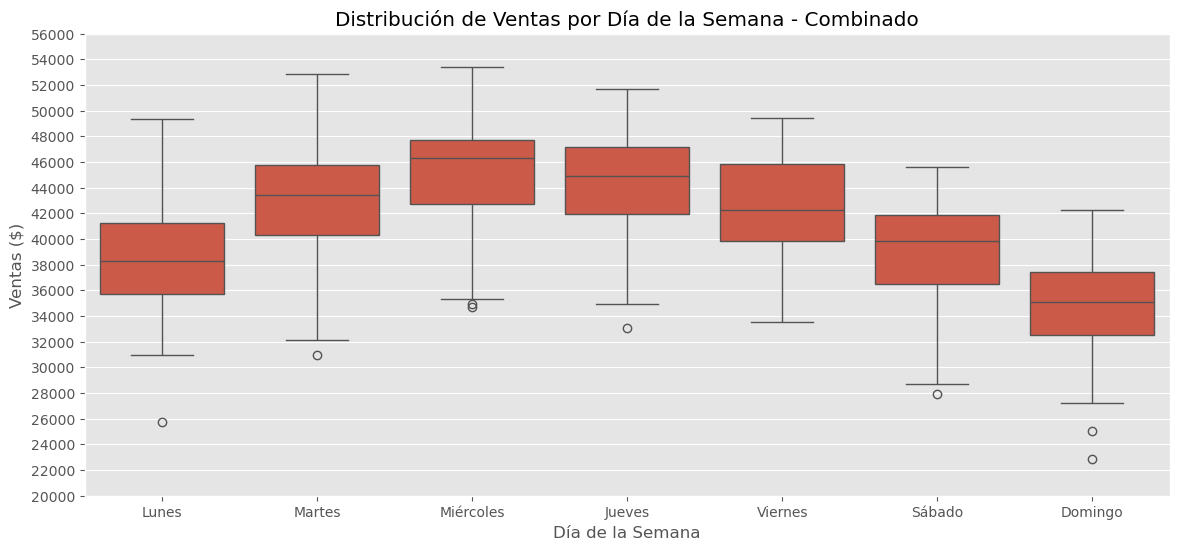

In [9]:
# Distribución de Ventas por Día
def plot_distribucion_diaria(data, tienda):
    orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='Nombre_Dia', y='Ventas', data=data, order=orden_dias)
    plt.title(f'Distribución de Ventas por Día de la Semana - {tienda}')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Ventas ($)')
    plt.xticks(range(7), nombres_dias)
    if str.lower(tienda)=='combinado':
        plt.yticks(range(20000, 56001, 2000))
    else:
        plt.yticks(range(8000, 30001, 2000))
    plt.show()

plot_distribucion_diaria(santa_ana, 'Santa Ana')
plot_distribucion_diaria(la_floresta, 'La Floresta')
plot_distribucion_diaria(ventas_combinadas.groupby(["Fecha", "Dia_Semana", "Nombre_Dia"])["Ventas"].sum().reset_index(), 'Combinado')


### Comparación de ventas entre tiendas

3- **Don Francisco está un poco preocupado porque tiene la impresión de que la tienda ’La Floresta’ vende menos que la tienda ’Santa Ana’.**

En una simple observación, vemos que en todos los meses del año la tienda de "La Floresta" vende mas que la tienda "Santa Ana".  
Esta diferencia varía entre un 10% y un 20% mas dependiendo el mes.

Esto se puede visualizar rápidamente en el siguiente grafico:


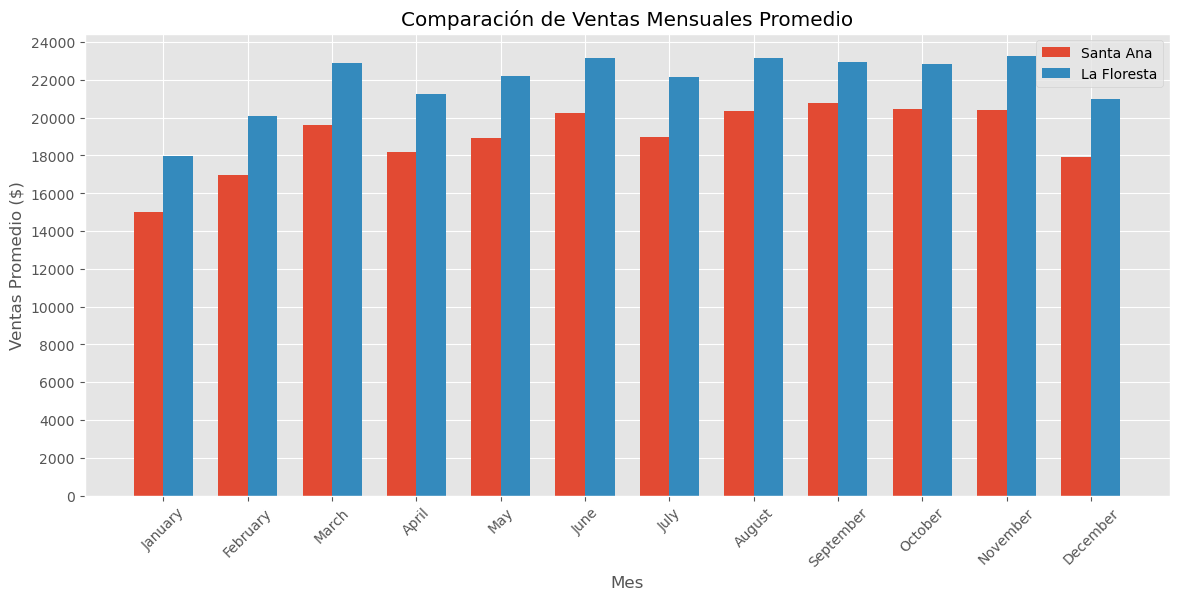


Diferencia porcentual (La Floresta vs Santa Ana):


,Diferencia %
Nombre_Mes,
January,19.49
February,18.39
March,16.65
April,16.83
May,17.24
June,14.29
July,16.72
August,13.77
September,10.47


In [10]:
#comparación entre tiendas
def comparacion_mensual(sa, lf):
    # Preparar datos
    sa_mean = sa.groupby('Nombre_Mes')['Ventas'].mean().reindex(calendar.month_name[1:13])
    lf_mean = lf.groupby('Nombre_Mes')['Ventas'].mean().reindex(calendar.month_name[1:13])
    
    # Gráfico
    plt.figure(figsize=(14, 6))
    width = 0.35
    x = np.arange(len(sa_mean))
    
    plt.bar(x - width/2, sa_mean, width, label='Santa Ana')
    plt.bar(x + width/2, lf_mean, width, label='La Floresta')
    
    plt.title('Comparación de Ventas Mensuales Promedio')
    plt.xlabel('Mes')
    plt.ylabel('Ventas Promedio ($)')
    plt.xticks(x, calendar.month_name[1:13], rotation=45)
    plt.yticks(range(0000, 24001, 2000))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Diferencia porcentual
    dif_porcentual = pd.DataFrame({ "Diferencia %": ((lf_mean - sa_mean) / sa_mean) * 100})
    # dif_porcentual.rename("as", inplace=True)
    print("\nDiferencia porcentual (La Floresta vs Santa Ana):")
    display(dif_porcentual.round(2))

comparacion_mensual(santa_ana, la_floresta)


### Planteamiento de la Hipótesis

Como debemos convencer a don Francisco, vamos a plantear la hipótesis alternativa que él mismo nos menciona, e intentaremos confirmarla con los datos que tenemos.

Basaremos nuestro análisis realizando la comparación entre supermercados, considerando la media anual para cada uno de ellos.  

**Esto nos lleva a plantear:**

_Hipótesis nula:_ la media de ventas de ambos supermercados es igual  
_Hipótesis alternativa:_ la media del supermercado “La Floresta” es menor a la media del supermercado “Santa Ana”.

Como desconocemos las varianzas, primero vamos a usar la prueba de hipótesis t para dos muestras (unilateral) con varianza desconocida.  
Comprobación H1 mediante t de 2 muestras (Grados de libertad: 728.0)  
Confianza 95% (t_hipo=13.0 < -t_alfa=-1.647), μ(La Floresta) < μ(Santa Ana): False  
Confianza 99% (t_hipo=13.0 < -t_alfa=-2.331), μ(La Floresta) < μ(Santa Ana): False  

Como observamos que la cantidad de muestras es suficientemente grande (y los grados de libertad), también hacemos la prueba como si conociéramos las varianzas, utilizando la varianza muestral como varianza del modelo.  
Comprobación H1 mediante z de 2 muestras  
Confianza 95% (z_hipo=13.0 < -z_alfa=-1.645), μ(La Floresta) < μ(Santa Ana): False  
Confianza 99% (z_hipo=13.0 < -z_alfa=-2.326), μ(La Floresta) < μ(Santa Ana): False  

En ambos casos observamos que el valor del estadístico para la verificación (13.0) no cumple con la condición “menor que” el valor negativo de los estadísticos para alfa=0.05 y alfa=0.01. (t < -t_a para rechazar H0)  
> Con estas evidencias, no nos alcanza para rechazar la hipótesis nula, o lo que es lo mismo, rechazamos la hipótesis alternativa.  
**Esto quiere decir que no podemos afirmar que las ventas en el supermercado “La Floresta” sean menores a las ventas en el supermercado “Santa Ana”**

In [4]:
def hipot_t_test(datos1, datos2, confianza, bilateral=False):
    n1 = len(datos1)
    n2 = len(datos2)
    m1 = datos1.mean()
    m2 = datos2.mean()
    s1 = datos1.std()
    s2 = datos2.std()
    gl=(s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1))
    t_alfa=stats.t.ppf((0.5 + confianza/2) if bilateral else confianza, df=gl)

    t_hipo = (m1-m2)/np.sqrt(s1**2/n1+s2**2/n2)
    return { "t_hipotesis": t_hipo, "t_alfa": t_alfa, "gl": gl }

def hipot_z_test(datos1, datos2, confianza, bilateral=False):
    n1 = len(datos1)
    n2 = len(datos2)
    m1 = datos1.mean()
    m2 = datos2.mean()
    s1 = datos1.std()
    s2 = datos2.std()
    z_alfa=stats.norm.ppf((0.5 + confianza/2) if bilateral else confianza)

    z_hipo = (m1-m2)/np.sqrt(s1**2/n1+s2**2/n2)
    return { "z_hipotesis": z_hipo, "z_alfa": z_alfa }

In [5]:
ventas_total_santa_ana = santa_ana['Ventas']
ventas_total_la_floresta = la_floresta['Ventas']

hipo_t_95 = hipot_t_test(ventas_total_la_floresta, ventas_total_santa_ana, 0.95)
hipo_t_99 = hipot_t_test(ventas_total_la_floresta, ventas_total_santa_ana, 0.99)
print(f"Comprobación H1 mediante t de 2 muestras (Grados de libertad: {round(hipo_t_95['gl'], 0)})")
print(f"Confianza 95% (t_hipo={round(hipo_t_95['t_hipotesis'], 3)} < -t_alfa={round(-hipo_t_95['t_alfa'], 3)}),"
      f" μ(La Floresta) < μ(Santa Ana): {hipo_t_95['t_hipotesis'] < -hipo_t_95['t_alfa']}")
print(f"Confianza 99% (t_hipo={round(hipo_t_99['t_hipotesis'], 3)} < -t_alfa={round(-hipo_t_99['t_alfa'], 3)}),"
      f" μ(La Floresta) < μ(Santa Ana): {hipo_t_99['t_hipotesis'] < -hipo_t_99['t_alfa']}")

print()
print(f"Comprobación H1 mediante z de 2 muestras")
hipo_z_95 = hipot_z_test(ventas_total_la_floresta, ventas_total_santa_ana, 0.95)
hipo_z_99 = hipot_z_test(ventas_total_la_floresta, ventas_total_santa_ana, 0.99)
print(f"Confianza 95% (z_hipo={round(hipo_z_95['z_hipotesis'], 3)} < -z_alfa={round(-hipo_z_95['z_alfa'], 3)}),"
      f" μ(La Floresta) < μ(Santa Ana): {hipo_z_95['z_hipotesis'] < -hipo_z_95['z_alfa']}")
print(f"Confianza 99% (z_hipo={round(hipo_z_99['z_hipotesis'], 3)} < -z_alfa={round(-hipo_z_99['z_alfa'], 3)}),"
      f" μ(La Floresta) < μ(Santa Ana): {hipo_z_99['z_hipotesis'] < -hipo_z_99['z_alfa']}")

print()
print(f"Comprobación H1 mediante librería scipy T-test two independent samples")
from scipy.stats import ttest_ind
p_value_ttest = ttest_ind(ventas_total_la_floresta, ventas_total_santa_ana, equal_var=False, alternative='less').pvalue
print(f"Confianza 95% (p_value: {round(p_value_ttest, 3)} < -alfa={-0.05}), μ(La Floresta) < μ(Santa Ana): {p_value_ttest<1-0.95}")
print(f"Confianza 99% (p_value: {round(p_value_ttest, 3)} < -alfa={-0.01}), μ(La Floresta) < μ(Santa Ana): {p_value_ttest<1-0.99}")


Comprobación H1 mediante t de 2 muestras (Grados de libertad: 728.0)
Confianza 95% (t_hipo=13.0 < -t_alfa=-1.647), μ(La Floresta) < μ(Santa Ana): False
Confianza 99% (t_hipo=13.0 < -t_alfa=-2.331), μ(La Floresta) < μ(Santa Ana): False

Comprobación H1 mediante z de 2 muestras
Confianza 95% (z_hipo=13.0 < -z_alfa=-1.645), μ(La Floresta) < μ(Santa Ana): False
Confianza 99% (z_hipo=13.0 < -z_alfa=-2.326), μ(La Floresta) < μ(Santa Ana): False

Comprobación H1 mediante librería scipy T-test two independent samples
Confianza 95% (p_value: 1.0 < -alfa=-0.05), μ(La Floresta) < μ(Santa Ana): False
Confianza 99% (p_value: 1.0 < -alfa=-0.01), μ(La Floresta) < μ(Santa Ana): False
